#Data Exploration and Preprocessing
In this notebook, I explore and prepare the hourly traffic volume dataset for forecasting. The goal is to create clean, regular time series per junction and understand traffic patterns over time.

The original dataset can be found here: [Traffic Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset/data)


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from google.colab import drive

# Mounting Google Drive
drive.mount('/content/drive')

# Loading dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Junction Traffic Forecasting Project/traffic.csv')
print(df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(48120, 4)


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [48]:
# Parsing datetime column and setting it as the new index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)
df.head(10)

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041
2015-11-01 05:00:00,1,6,20151101051
2015-11-01 06:00:00,1,9,20151101061
2015-11-01 07:00:00,1,8,20151101071
2015-11-01 08:00:00,1,11,20151101081


In [49]:
# Checking for missing timestamps in the dataset
print("First reading taken at: ", df.index.min())
print("Last reading taken at: ", df.index.max())

# Generate expected timestamps (vehicle counts at the junctions are recorded hourly)
# compare expected timestamps to the real timestamps
expected_timestamps = pd.date_range(start=df.index.min(), end=df.index.max(), freq='h')
missing_timestamps = expected_timestamps.difference(df.index)
print("Number of missing timestamps: ", len(missing_timestamps))

First reading taken at:  2015-11-01 00:00:00
Last reading taken at:  2017-06-30 23:00:00
Number of missing timestamps:  0


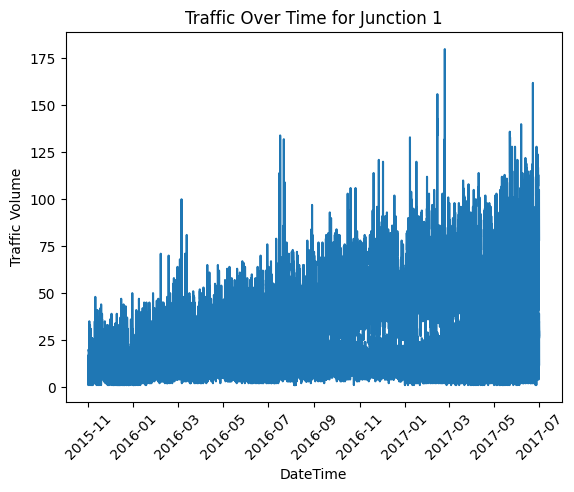

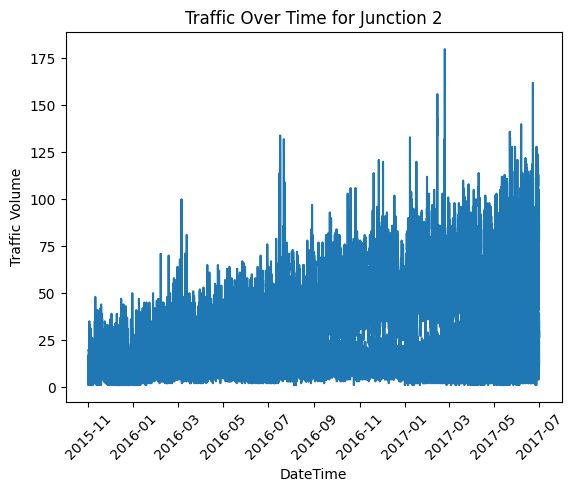

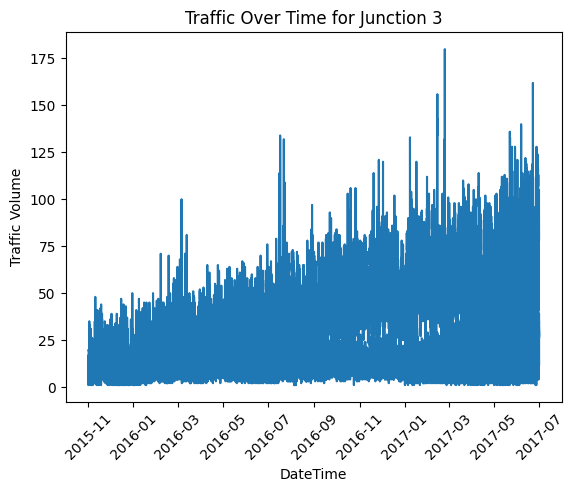

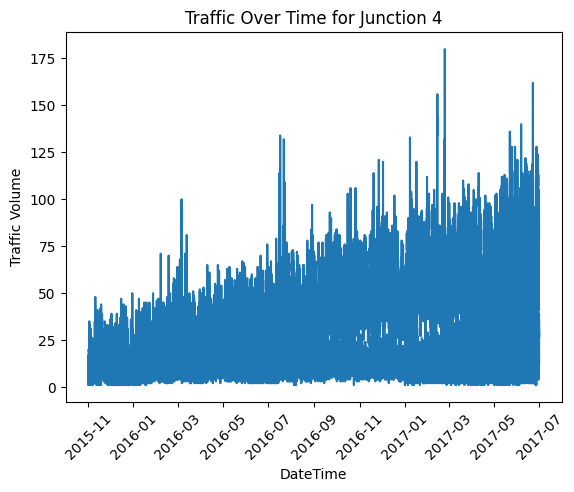

In [50]:
# Plotting traffic over time per junction
junctions = ['Junction 1', 'Junction 2', 'Junction 3', 'Junction 4']

for junction in junctions:
  plt.plot(df.index, df["Vehicles"])
  plt.title(f'Traffic Over Time for {junction}')
  plt.xlabel('DateTime')
  plt.xticks(rotation=45)
  plt.ylabel('Traffic Volume')
  plt.show()

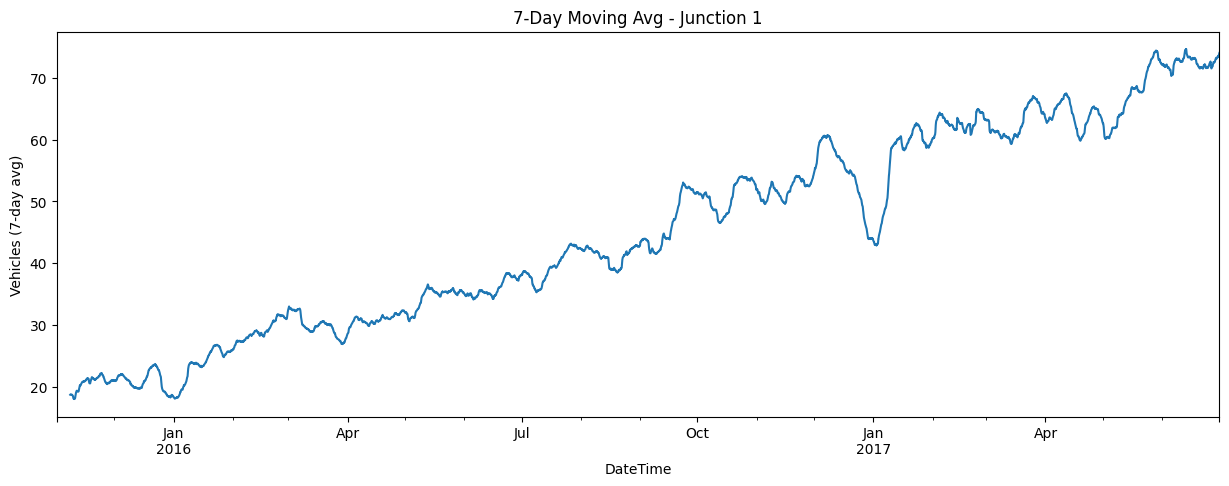

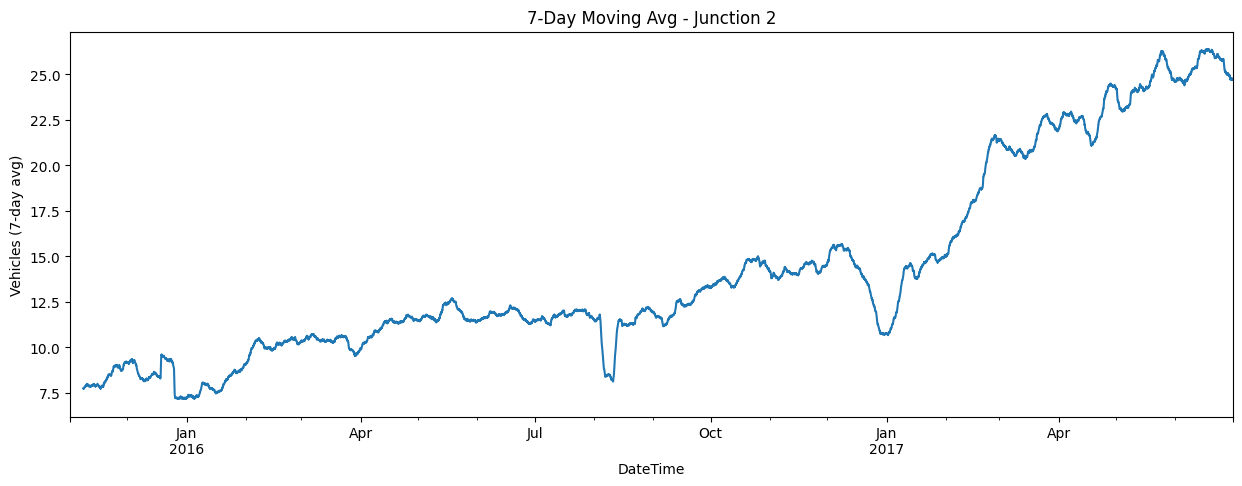

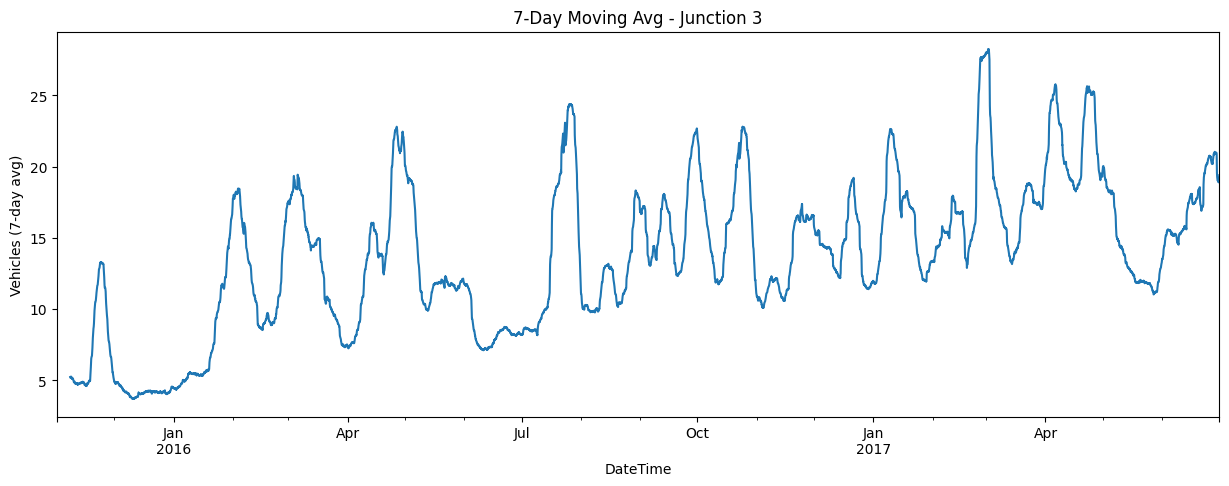

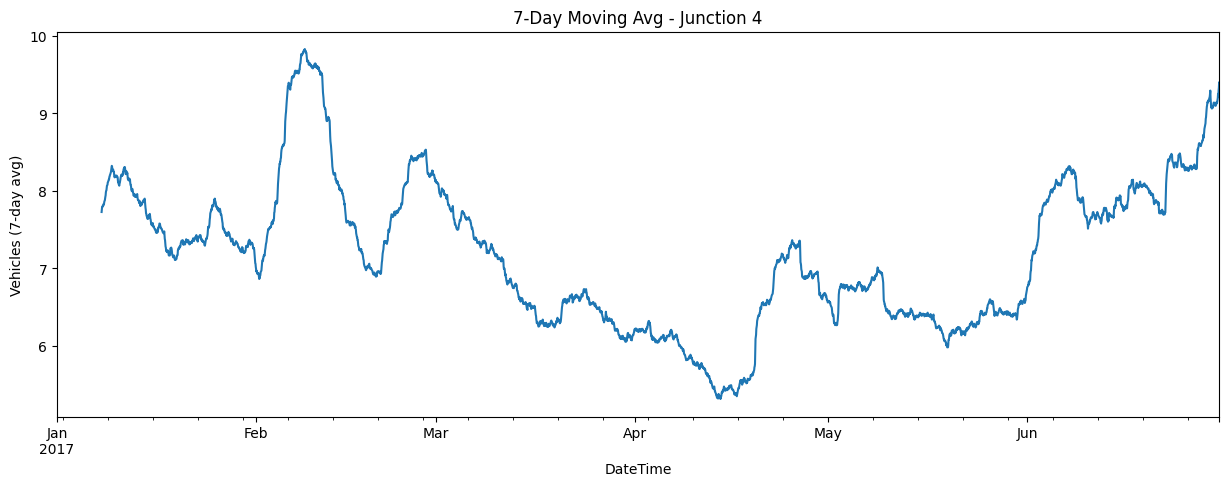

In [51]:
# Plotting Rolling Average
junctions = [1, 2, 3, 4]

for j in junctions:
    # Filter for this junction and sort by DateTime index
    df_j = df[df['Junction'] == j].copy()
    df_j = df_j.sort_index()

    # Compute rolling average
    df_j['Vehicles_Rolling'] = df_j['Vehicles'].rolling(window=24*7).mean()  # 7-day moving avg

    df_j['Vehicles_Rolling'].plot(figsize=(15,5), title=f'7-Day Moving Avg - Junction {j}')
    plt.xlabel('DateTime')
    plt.ylabel('Vehicles (7-day avg)')
    plt.show()


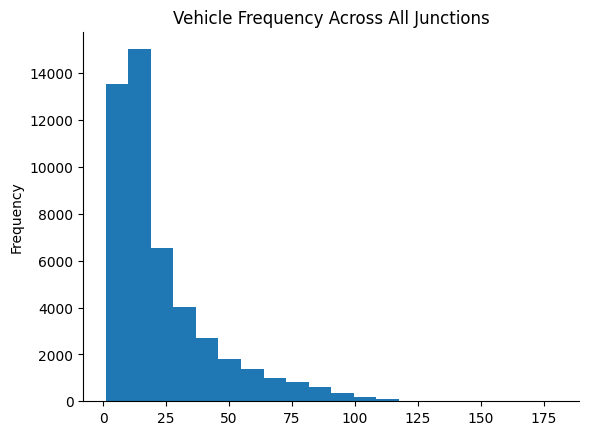

In [52]:
# Plotting Vehicle Frequency
df['Vehicles'].plot(kind='hist', bins=20, title='Vehicle Frequency Across All Junctions')
plt.gca().spines[['top', 'right',]].set_visible(False)

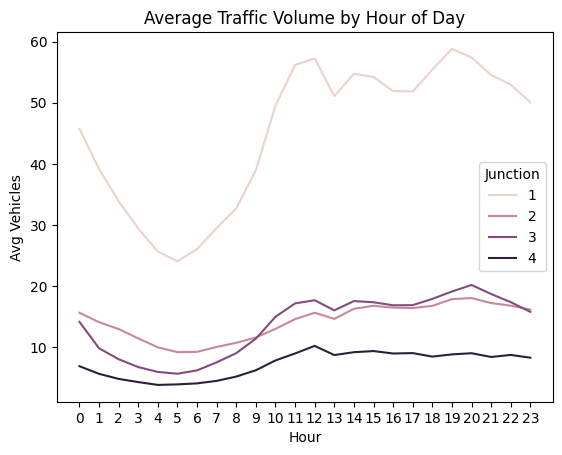

In [53]:
# Plotting Hourly Traffic Volume per Junction
df['Hour'] = df.index.hour

hourly_avg = df.groupby(['Junction', 'Hour'])['Vehicles'].mean().reset_index()

sns.lineplot(data=hourly_avg, x='Hour', y='Vehicles', hue='Junction')
plt.title('Average Traffic Volume by Hour of Day')
plt.ylabel('Avg Vehicles')
plt.xticks(range(24))
#plt.grid(axis='x')
plt.show()

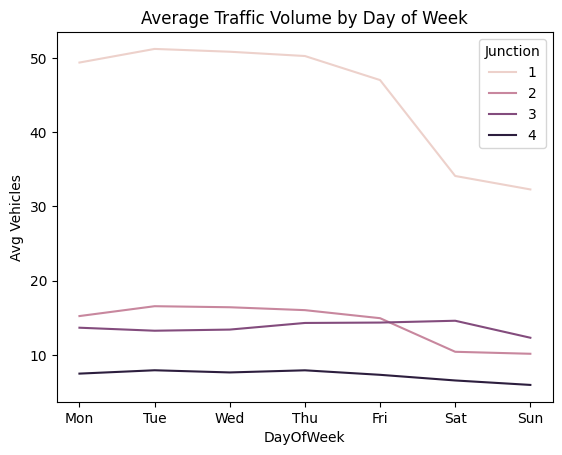

In [54]:
# Plotting Daily Traffic Volume per Junction
df['DayOfWeek'] = df.index.dayofweek  # 0=Monday, 6=Sunday
x_ticks = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

daily_avg = df.groupby(['Junction', 'DayOfWeek'])['Vehicles'].mean().reset_index()

sns.lineplot(data=daily_avg, x='DayOfWeek', y='Vehicles', hue='Junction')
plt.title('Average Traffic Volume by Day of Week')
plt.ylabel('Avg Vehicles')
plt.xticks(range(7), x_ticks)
#plt.grid(axis='x')
plt.show()

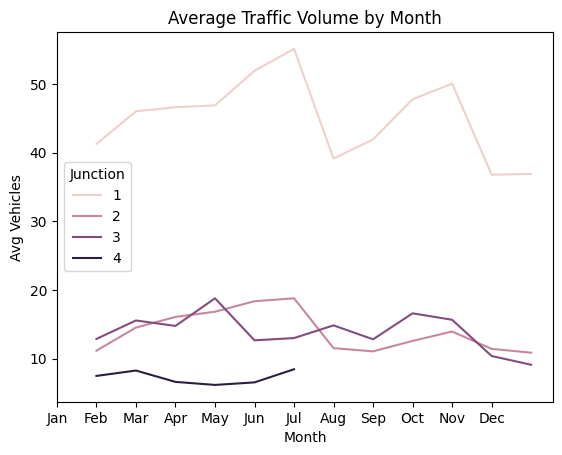

In [55]:
# Plotting Daily Traffic Volume per Junction
df['Month']  = df.index.month
x_ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_avg = df.groupby(['Junction', 'Month'])['Vehicles'].mean().reset_index()

sns.lineplot(data=monthly_avg, x='Month', y='Vehicles', hue='Junction')
plt.title('Average Traffic Volume by Month')
plt.ylabel('Avg Vehicles')
plt.xticks(range(12), x_ticks)
#plt.grid(axis='x')
plt.show()

In [56]:
# Saving cleaned dataset
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Junction Traffic Forecasting Project/cleaned_traffic.csv')
